<a href="https://colab.research.google.com/github/Classymotion/Smilegate/blob/main/nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non linear regression / curve fitting

You'll find more information and detailed explainations on [my blog](https://lucidar.me/en/neural-networks/curve-fitting-nonlinear-regression/).

[Video of the expected result](https://youtu.be/7z86Lxzf_2o)


## Check/install TensorFlow version
**Must be version 2.1.0**


In [ ]:
# Switch the TensorFlow version 2.1
!pip install tensorflow==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421.8 MB 25 kB/s 
     |████████████████████████████████| 3.8 MB 44.9 MB/s 
     |████████████████████████████████| 448 kB 58.6 MB/s 
     |████████████████████████████████| 26.1 MB 1.4 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=499e7455c9e5b2b15836da11282d1688d08079d0a6c1c19139f29c19b18c6783
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      

## Import libraries and create noisy data



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import tensorflow as tf
import math

print ('TensorFlow version: ' + tf.__version__)

# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

TensorFlow version: 2.1.0
Data created successfully


## Display curve to fit

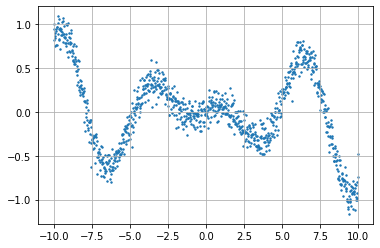

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Display the dataset
plt.scatter(x_data[::1], y_data[::1], s=2)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
files.download('dataset.png') 

# Create the model
Create the model with two 64 units hidden layers.

In [ ]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


## Training over 100 epochs

In [ ]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 807us/sample - loss: 0.1885
Epoch 2/100
1000/1000 [==============================] - 0s 126us/sample - loss: 0.1908
Epoch 3/100
1000/1000 [==============================] - 0s 125us/sample - loss: 0.1837
Epoch 4/100
1000/1000 [==============================] - 0s 177us/sample - loss: 0.1844
Epoch 5/100
1000/1000 [==============================] - 0s 142us/sample - loss: 0.1817
Epoch 6/100
1000/1000 [==============================] - 0s 146us/sample - loss: 0.1806
Epoch 7/100
1000/1000 [==============================] - 0s 130us/sample - loss: 0.1802
Epoch 8/100
1000/1000 [==============================] - 0s 197us/sample - loss: 0.1799
Epoch 9/100
1000/1000 [==============================] - 0s 128us/sample - loss: 0.1741
Epoch 10/100
1000/1000 [==============================] - 0s 143us/sample - loss: 0.1684
Epoch 11/100
1000/1000 [==============================] - 0s 100us/sample - loss: 0.1635
Epoch 12

# Predict and display

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

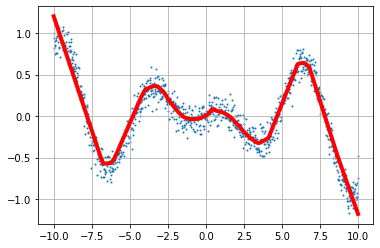

In [ ]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
files.download("training.png") 

## Create image sequence for the video

Run this section to generate a sequence of images for the [video](https://www.youtube.com/watch?v=7z86Lxzf_2o).

To get the video from the beginning, you have to reset the model weight. Re-creating the model should reseting the weights.

In [ ]:
for x in range(100):
  # One epoch
  model.fit( x_data, y_data, epochs=1, verbose=1)

  # Compute the output 
  y_predicted = model.predict(x_data)

  # Display the result
  plt.scatter(x_data[::1], y_data[::1], s=2)
  plt.plot(x_data, y_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)  
  #plt.show()
  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  files.download('training-' + str(x) +'-epochs.png') 
  plt.clf()



Train on 1000 samples
1000/1000 [==============================] - 0s 79us/sample - loss: 0.0170


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0187


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 132us/sample - loss: 0.0172


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 57us/sample - loss: 0.0166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0163


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0162


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0163


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0158


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 68us/sample - loss: 0.0160


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0162


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0161


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0172


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 66us/sample - loss: 0.0163


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0165


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 63us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 82us/sample - loss: 0.0196


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 68us/sample - loss: 0.0166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 64us/sample - loss: 0.0179


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0164


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 82us/sample - loss: 0.0160


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 64us/sample - loss: 0.0170


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0158


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0150


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0169


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 64us/sample - loss: 0.0162


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0172


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0161


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0163


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 147us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 162us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 238us/sample - loss: 0.0179


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0150


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0147


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0165


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0159


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 81us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0175


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 64us/sample - loss: 0.0152


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 79us/sample - loss: 0.0177


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0160


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0189


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 76us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 66us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 66us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0158


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 68us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 70us/sample - loss: 0.0147


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0159


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 61us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0146


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 63us/sample - loss: 0.0162


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0152


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 66us/sample - loss: 0.0143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 78us/sample - loss: 0.0184


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 61us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 94us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0146


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 70us/sample - loss: 0.0147


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 70us/sample - loss: 0.0172


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 79us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 79us/sample - loss: 0.0143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 70us/sample - loss: 0.0145


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0158


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 73us/sample - loss: 0.0147


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0146


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0158


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 83us/sample - loss: 0.0152


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0147


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0139


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0140


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>